In [1]:
#Import Dependencies
import pandas as pd
import numpy as np 

# data visualization
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns

# Algorithms
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_predict,StratifiedKFold, learning_curve
from sklearn.feature_selection import SelectFromModel,RFECV
from sklearn import linear_model, tree
from sklearn.linear_model import LogisticRegression,Perceptron,SGDClassifier,LassoCV
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("C:/Users/jonal/OneDrive/Documents/FranklinU/DATA695/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition/ObesityDataSet_raw_and_data_sinthetic.csv")

### Exploratory Data Analysis (EDA)

#### Let's first understand the data types involved with our explanatory (feature) variables! Columns 0-15 are considered the explanatory variables and consists of 8 string data types & 8 numerical data types. 
#### Next up we can also see the target variables (NObeyesdad) which is a categorical data type. 

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

#### Focusing on the numerical data types first, we can see that variables Age, Height & Weight are in a scale in years, meters & kilograms respectively. However the other variables, FCVC, NCP, CH20, FAF & TUE seem to be categorical variables converted into numeric values. We can see this because these values range from 0-4. 

In [13]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


#### Lets understand the distribution and correlation among these numeric variables

c:\Users\jonal\OneDrive\Documents\FranklinU\DATA695\Final Project Repo\FranklinU\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


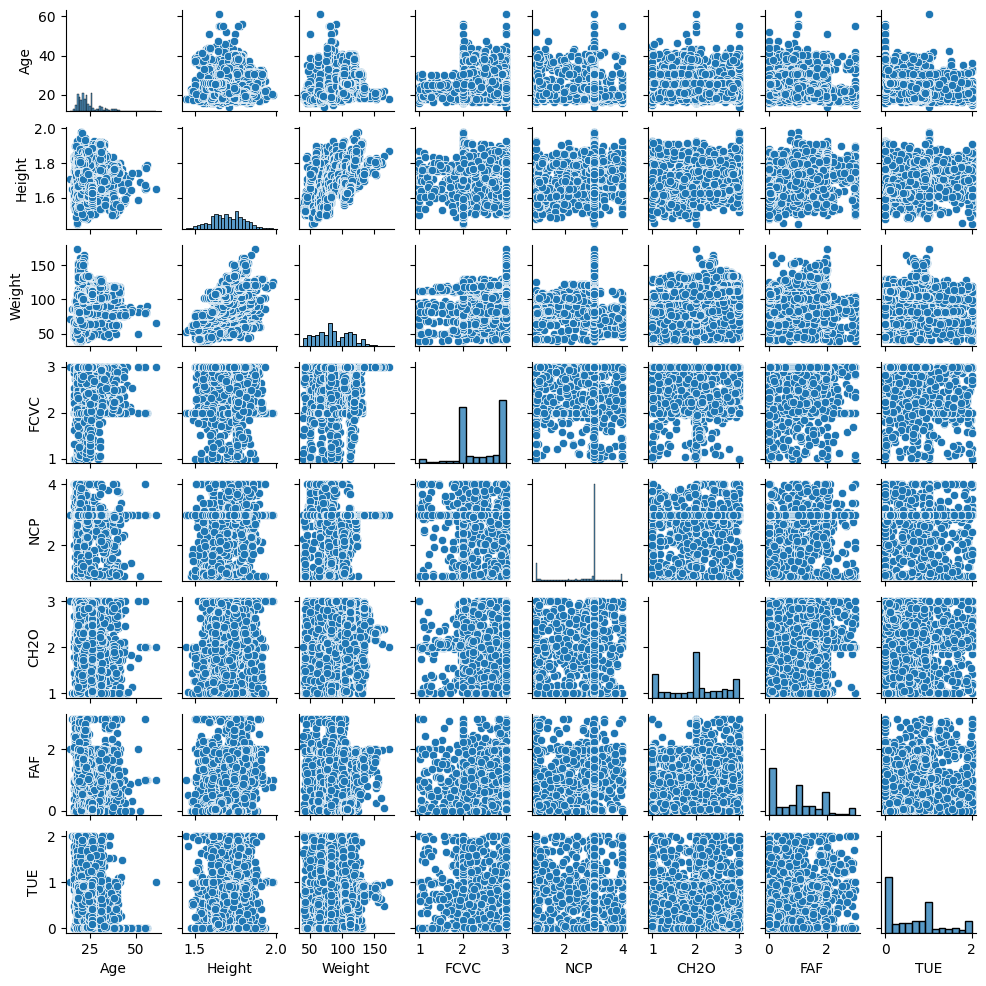

In [24]:
g = sns.pairplot(data)
g.fig.set_size_inches(10,10)

#### This pairplot shows a generally balanced distribution for variables Age, Height & Weight. Additionally, we will tend to see with higher height comes higher weight overall which describes the only correlation between Height & Weight. As for the remaining variables we see a spike or two which represent a category. For example the NCP variable (Number of main meals) includes most values at 3, which is expected. Now lets move on to the string/object variables!

In [10]:
data.describe(include='object')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [3]:
dffeatures = pd.get_dummies(data.iloc[:,0:16])

In [9]:
genderfeat = pd.get_dummies(data.iloc[:,0:1])
scaler = MinMaxScaler()
scaler.fit(genderfeat )
scaler.transform(genderfeat )

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [50]:
scaler = MinMaxScaler()
scaler.fit(dffeatures)

MinMaxScaler()

In [51]:
scaledfeat = scaler.transform(dffeatures)

In [56]:
pd.DataFrame(scaledfeat)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.148936,0.320755,0.186567,0.5,0.666667,0.500000,0.000000,0.500000,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.148936,0.132075,0.126866,1.0,0.666667,1.000000,1.000000,0.000000,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.191489,0.660377,0.283582,0.5,0.666667,0.500000,0.666667,0.500000,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.276596,0.660377,0.358209,1.0,0.666667,0.500000,0.666667,0.000000,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.170213,0.622642,0.379104,0.5,0.000000,0.500000,0.000000,0.000000,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.148443,0.491943,0.689616,1.0,0.666667,0.364070,0.558756,0.453124,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2107,0.169850,0.563366,0.707037,1.0,0.666667,0.502565,0.447130,0.299635,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2108,0.181362,0.570200,0.706637,1.0,0.666667,0.527097,0.471403,0.323144,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2109,0.220467,0.546132,0.704079,1.0,0.666667,0.926170,0.379702,0.293017,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [57]:
dftarget = data['NObeyesdad']

In [70]:
# X -> features
# y -> label
X = pd.DataFrame(scaledfeat)
y = dftarget
  
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 0)
  
# training a DescisionTreeClassifier
rf_model = RandomForestClassifier(max_depth = 2).fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

In [73]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=rf_model.classes_)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Insufficient_Weight'),
  Text(1, 0, 'Normal_Weight'),
  Text(2, 0, 'Obesity_Type_I'),
  Text(3, 0, 'Obesity_Type_II'),
  Text(4, 0, 'Obesity_Type_III'),
  Text(5, 0, 'Overweight_Level_I'),
  Text(6, 0, 'Overweight_Level_II')])

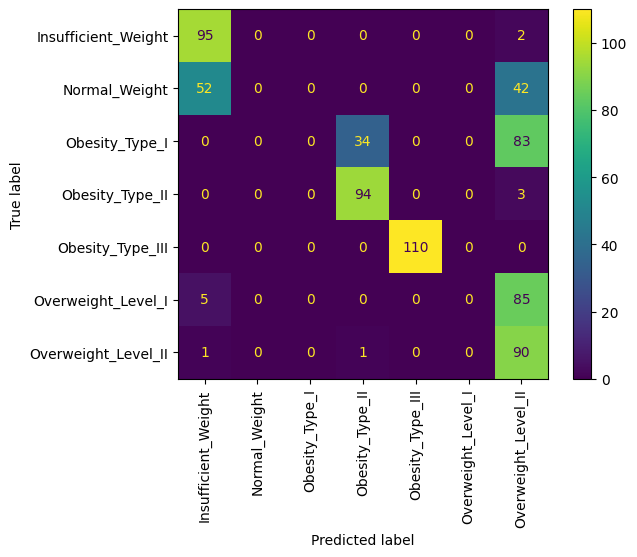

In [62]:
disp.plot()
plt.xticks(rotation = 90)

In [27]:

gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
  
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
  
# creating a confusion matrix
cm_nb = confusion_matrix(y_test, gnb_predictions)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Insufficient_Weight'),
  Text(1, 0, 'Normal_Weight'),
  Text(2, 0, 'Obesity_Type_I'),
  Text(3, 0, 'Obesity_Type_II'),
  Text(4, 0, 'Obesity_Type_III'),
  Text(5, 0, 'Overweight_Level_I'),
  Text(6, 0, 'Overweight_Level_II')])

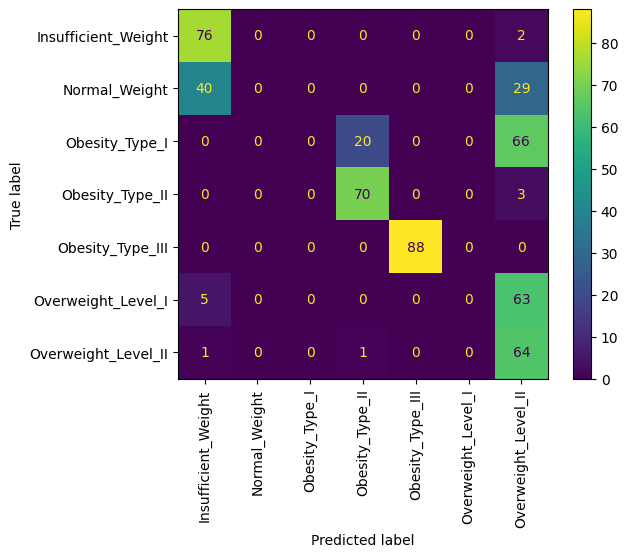

In [30]:
nb_disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=dtree_model.classes_)
nb_disp.plot()
plt.xticks(rotation = 90)